# Lab 2: Кольорове балансування зображень
### Шевченко Юлія, ФІ-31мн

In [1]:
# All the imports for the task
import cv2
import numpy as np
from matplotlib import pyplot as plt

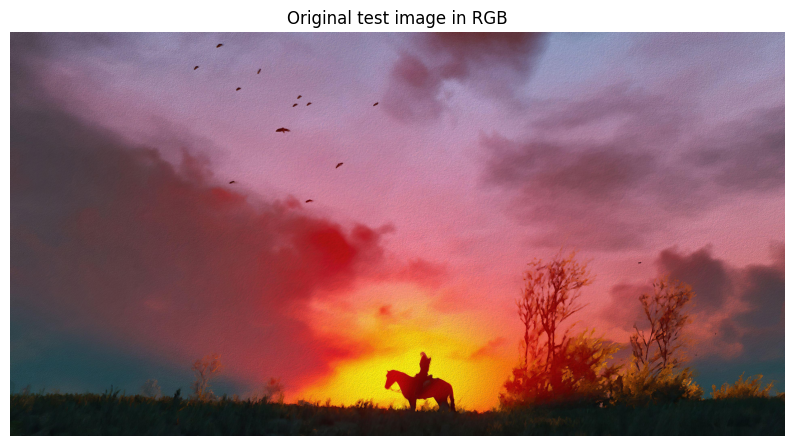

In [2]:
# Loading the test image
image_path = '../Lab_2/test_img.jpg'
img = cv2.imread(image_path)

# Convert BGR to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Plot the image
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.title('Original test image in RGB')
plt.axis('off')
plt.show()

## White Patch Algorithm

The White Patch algorithm involves selecting a group of pixels that are expected to be white. Subsequently, the image's color channels are adjusted by scaling them based on the color values within this white patch. This method aims to normalize the color balance of the image by using the assumption that certain regions should appear white, thus providing a basis for color correction.

In [3]:
# Define coordinates for the white patch
row, col = 500, 500

# Extract the white patch color values
white_patch_color_val = img[row, col, :]

# Calculate scaling coefficients for white balancing
scaling_coefficients = 255.0 / white_patch_color_val

# Apply white balancing and generate balanced image
balanced_img = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced_img[..., channel] = img[..., channel] * scaling_coefficients[channel]

# Clip the values to ensure the dynamic range is preserved
balanced_img = balanced_img / 255
balanced_img[balanced_img > 1] = 1

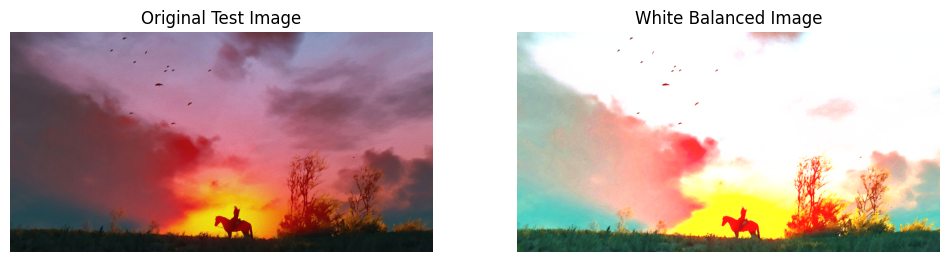

In [4]:
# Plot the original and balanced images side by side
plt.figure(figsize=(12, 6))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Test Image')
plt.axis('off')

# Balanced Image
plt.subplot(1, 2, 2)
plt.imshow(balanced_img)
plt.title('White Balanced Image')
plt.axis('off')

plt.show()